ARTI308 - Machine Learning

# Lab 3: Exploratory Data Analysis (EDA)

EDA is the first and most important step in any Machine Learning project.
Before building models, we must understand:

- What does the data represent?
- Are there missing values?
- Are there outliers?
- What patterns exist?
- Which variables influence others?

If we do not understand the data, we cannot build a good model.

### Why EDA is Important

In real-world machine learning projects:

    1- 70–80% of the time is spent on understanding and cleaning data
    2- Only 20–30% is spent building models

**EDA helps us:**

- Detect errors
- Identify trends
- Discover relationships
- Make business decisions

In [2]:
import pandas as pd


In [4]:
df.shape


(3000, 2)

In [5]:
df.head()


,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [6]:
df.columns


Index(['email', 'label'], dtype='str')

In [7]:
df.dtypes


email      str
label    int64
dtype: object

In [8]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   email   2999 non-null   str  
 1   label   3000 non-null   int64
dtypes: int64(1), str(1)
memory usage: 47.0 KB


In [9]:
df['label'].value_counts()


label
0    2500
1     500
Name: count, dtype: int64

In [10]:
df['label'].value_counts(normalize=True) * 100


label
0    83.333333
1    16.666667
Name: proportion, dtype: float64

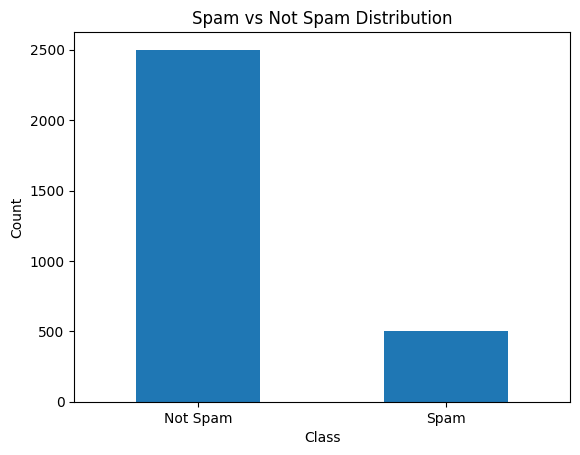

In [11]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar')
plt.title("Spam vs Not Spam Distribution")
plt.xticks([0, 1], ["Not Spam", "Spam"], rotation=0)
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


The Dataset contains 3000 emails. The distribution shows that the dataset is slightly imbalanced, with more non-spam emails than spam emails.

In [16]:
df['email'] = df['email'].fillna('')
df['email'] = df['email'].astype(str)
df['email_length'] = df['email'].str.len()

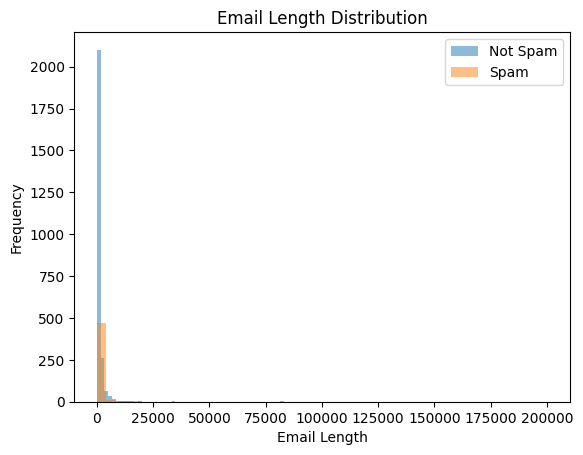

In [17]:
plt.hist(df[df['label'] == 0]['email_length'], 
         bins=50, alpha=0.5, label='Not Spam')

plt.hist(df[df['label'] == 1]['email_length'], 
         bins=50, alpha=0.5, label='Spam')

plt.legend()
plt.title("Email Length Distribution")
plt.xlabel("Email Length")
plt.ylabel("Frequency")
plt.show()


Spam emails tend to have slightly different length characteristics compared to non-spam emails. This suggests that message length may be a useful feature for classification.

In [18]:
from collections import Counter
import re

spam_text = ' '.join(df[df['label'] == 1]['email']).lower()
spam_words = re.findall(r'\b\w+\b', spam_text)

Counter(spam_words).most_common(20)


[('number', 7339),
 ('the', 5783),
 ('to', 4899),
 ('and', 3722),
 ('of', 3572),
 ('you', 3512),
 ('a', 2500),
 ('in', 2152),
 ('for', 2044),
 ('your', 1896),
 ('this', 1767),
 ('is', 1611),
 ('i', 1378),
 ('that', 1183),
 ('url', 1171),
 ('with', 1008),
 ('it', 990),
 ('or', 976),
 ('on', 936),
 ('are', 935)]

In [19]:
not_spam_text = ' '.join(df[df['label'] == 0]['email']).lower()
not_spam_words = re.findall(r'\b\w+\b', not_spam_text)

Counter(not_spam_words).most_common(20)


[('number', 26450),
 ('the', 22932),
 ('to', 13496),
 ('of', 10678),
 ('and', 10666),
 ('a', 10481),
 ('i', 7626),
 ('url', 7511),
 ('in', 7302),
 ('is', 6388),
 ('that', 6327),
 ('it', 6065),
 ('for', 4709),
 ('s', 4151),
 ('on', 4095),
 ('you', 3774),
 ('this', 3557),
 ('with', 3170),
 ('t', 2826),
 ('be', 2805)]

Common spam words indicate promotional or urgent content patterns, while non-spam emails contain more regular conversational language.